<a href="https://colab.research.google.com/github/LSSTDESC/tomo_challenge/blob/master/notebooks/TomoChallenge_GettingStarted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DESC Tomographic Binning Challenge: Getting Started

Author: [EiffL](https://github.com/EiffL)

This notebook is intended to be a quick introduction to the Tomo Challenge, in a premade environment, so that you get started rightaway. 

You can find out more about the challenge on the github [README](https://github.com/LSSTDESC/tomo_challenge/blob/master/README.md) file, and/or by following this introduction:
[![Alt text](https://img.youtube.com/vi/9U-4StPk_50/0.jpg)](https://www.youtube.com/watch?v=9U-4StPk_50)

With slides available [here](https://slides.com/eiffl/the-desc-tomo-challenge)


Here you will see:
  - How to download the data
  - How to load and explore the challenge training data
  - How to apply one of the existing tomo binning method
  - How to compute the metrics

## Step 0: Installing dependencies and downloading data

You can mindlessly execute the cells under this section, which will just setup
the environment and the data for you. We don't ofuscate these steps as they can
also be useful for you when setting up the challenge locally.

In [ ]:
# This downloads the repo
!git clone https://github.com/LSSTDESC/tomo_challenge.git
%cd tomo_challenge/

Cloning into 'tomo_challenge'...
remote: Enumerating objects: 159, done.
remote: Counting objects: 100% (159/159), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 384 (delta 83), reused 77 (delta 29), pack-reused 225
Receiving objects: 100% (384/384), 73.43 KiB | 9.18 MiB/s, done.
Resolving deltas: 100% (194/194), done.
/content/tomo_challenge


In [ ]:
# Installing all challenging challenge dependencies through conda
!wget https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh && bash Miniconda3-4.5.4-Linux-x86_64.sh -bfp /usr/local
# Update conda
!conda install -y -q conda python=3.6 
!conda update --channel defaults --all --yes
# Install dependencies
!conda install -y -q -c conda-forge pyccl cosmosis-standalone camb firecrown 
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')

# And finally installing the remaining ones by pip
!pip install --quiet sacc click progressbar scikit-learn

In [ ]:
# Downloading the challenge data
!python -m tomo_challenge.data

Found classifier IBandOnly
Found classifier Random
Found classifier RandomForest
/usr/local/lib/python3.6/runpy.py:125: RuntimeWarning: 'tomo_challenge.data' found in sys.modules after import of package 'tomo_challenge', but prior to execution of 'tomo_challenge.data'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
100% ||
100% ||


##  Loading the data

In [ ]:
%pylab inline
import tomo_challenge as tc

# Some configuration parameters for accessing the data
bands='riz'
training_file='data/training.hdf5'
validation_file='data/validation.hdf5'
include_colors=True
include_errors=True

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# This is how we read the data file
training_data = tc.load_data(training_file, bands, errors=include_errors,
                             colors=include_errors)

In [ ]:
# The resulting training data is a dictionary containing magnitude, color, and 
# errors on those
training_data

{'i': array([24.53641383, 23.03615097, 24.51262462, ..., 21.62752433,
        22.82452626, 23.26073447]),
 'i_err': array([0.06176932, 0.015512  , 0.06043063, ..., 0.00423855, 0.01276491,
        0.0190766 ]),
 'iz': array([0.20449715, 0.10327952, 0.33050151, ..., 0.58405244, 0.16684829,
        0.22952429]),
 'iz_err': array([0.10693806, 0.02863038, 0.09713212, ..., 0.00598314, 0.02262182,
        0.0325268 ]),
 'r': array([25.16528674, 23.37529341, 25.54619628, ..., 21.81988879,
        23.15327554, 23.4619931 ]),
 'r_err': array([0.07861828, 0.01511911, 0.11165736, ..., 0.00360881, 0.01232307,
        0.01637593]),
 'ri': array([0.6288729 , 0.33914244, 1.03357166, ..., 0.19236446, 0.32874927,
        0.20125863]),
 'ri_err': array([0.09998141, 0.02166124, 0.12696152, ..., 0.00556676, 0.01774264,
        0.02514136]),
 'rz': array([0.83337005, 0.44242195, 1.36407317, ..., 0.77641689, 0.49559756,
        0.43078292]),
 'rz_err': array([0.11747823, 0.02841943, 0.13509313, ..., 0.005554

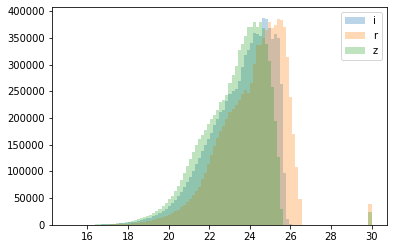

In [ ]:
# Let's have a look at the distribution of magnitudes
hist(training_data['i'], 100,range=[15,30],label='i',alpha=0.3);
hist(training_data['r'], 100,range=[15,30],label='r',alpha=0.3);
hist(training_data['z'], 100,range=[15,30],label='z',alpha=0.3);
legend();

Note in this plot that we have some galaxies at a magnitude of 30, this is simply to signify that these are not detected in the corresponding bands.

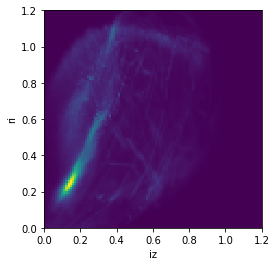

In [ ]:
# Let's have a look at some color-color plots
hist2d(training_data['iz'], training_data['ri'], 100, range=[[0,1.2],[0,1.2]]);
gca().set_aspect('equal')
xlabel('iz')
ylabel('ri');

In [ ]:
# We can also load the true redshift for each galaxy
training_z = tc.load_redshift(training_file)

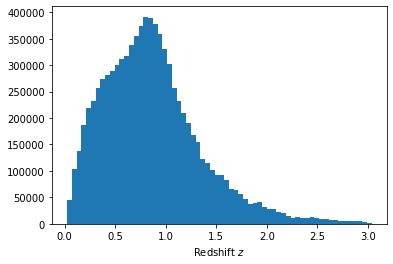

In [ ]:
# Here is the distribution in redshift of our sample
hist(training_z,64);
xlabel('Redshift $z$');

In [ ]:
m = ( training_data['r'] > 20.) & (training_data['r'] < 24.)

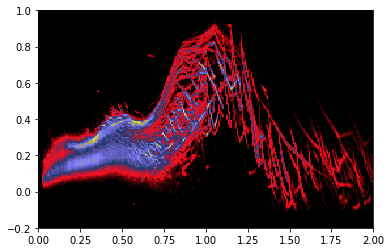

In [ ]:
hist2d(training_z[m], training_data['iz'][m], 256, range=[[0,2],[-0.2,1]],cmap='gist_stern');

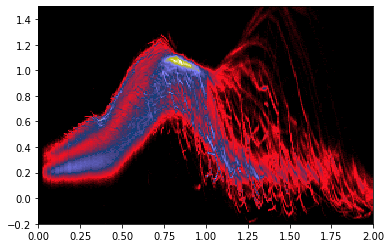

In [ ]:
hist2d(training_z, training_data['ri'], 256, range=[[0,2],[-0.2,1.5]],cmap='gist_stern');

## Train a simple regression model

Now that we have seen how to access the data,
let's train a simple classifier based on a decision tree.

In [ ]:
import tomo_challenge as tc

Found classifier IBandOnly
Found classifier Random
Found classifier RandomForest


In [ ]:
# Instantiate one of these classifiers
classifier = tc.Tomographer._find_subclass('RandomForest')(bands,{'bins':2})

In [ ]:
# Use the challenge code to train the classifier
train_data_arr = tc.load_data(training_file, bands, 
                             errors=include_errors,
                             colors=include_errors, array=True)
classifier.train(train_data_arr, training_z)

Finding bins for training data
Fitting classifier


In [ ]:
# Now we can apply it, sorry it takes a while....
valid_data_arr = tc.load_data(validation_file, bands, 
                              errors=include_errors,
                              colors=include_errors, array=True)
results = classifier.apply(valid_data_arr)

In [ ]:
results

array([1., 0., 0., ..., 0., 1., 0.])

In [ ]:
# Load the validation redshifts
val_z = tc.load_redshift(validation_file)

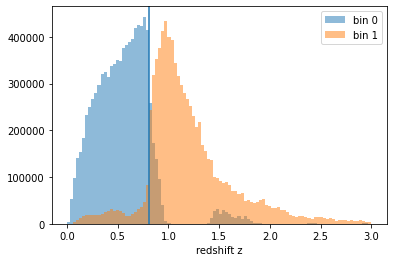

In [ ]:
hist(val_z[results == 0.],100,alpha=0.5,range=[0,3], label='bin 0');
hist(val_z[results == 1.],100,alpha=0.5,range=[0,3], label='bin 1');
legend();
axvline(0.81183875)
xlabel('redshift z');

## Evaluate the metrics

Now that we have a classification in terms of bins for each galaxy, we can try to compute some of the challenge metrics.

In [ ]:
scores = tc.compute_scores(results, val_z, metrics=['SNR_3x2', 'FOM_3x2'])

Running in serial mode (one process).

Parameter Priors
----------------
params--omega_k  ~ delta(0.0)
params--omega_c  ~ U(0.25, 0.32)
params--omega_b  ~ U(0.04, 0.05)
params--h        ~ U(0.5, 0.9)
params--n_s      ~ U(0.9, 1.02)
params--sigma8   ~ U(0.74, 0.94)
params--w0       ~ delta(-1.0)
params--wa       ~ delta(0.0)
params--bias_0   ~ delta(1.345519637175526)
params--bias_1   ~ delta(1.7981605004342474)


****************************
* Running sampler 1/1: fisher
* Saving output -> /tmp/tmp6vd5e_xv/chain.txt
****************************
Calculating derivatives using 20 total models


In [ ]:
scores

{'FOM_3x2': 2548.9734486222214, 'SNR_3x2': 896.0364064510547}

In [ ]:
# Now we can try to see the score we would get if we cheated and had a perfect
# true redshift-based binning
# Find the edges that split the redshifts into n_z bins of
# equal number counts in each
p = np.linspace(0, 100, 3)
z_edges = np.percentile(val_z, p)

In [ ]:
z_edges

array([0.02446675, 0.81183875, 3.03611755])

In [ ]:
perfect_results = np.zeros_like(results)
perfect_results[val_z  > z_edges[1]] = 1.

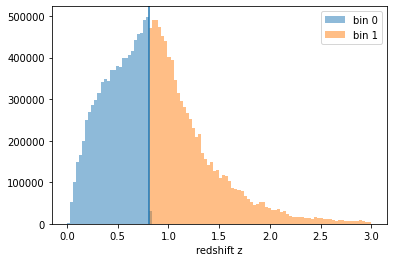

In [ ]:
hist(val_z[perfect_results == 0.],100,alpha=0.5,range=[0,3], label='bin 0');
hist(val_z[perfect_results == 1.],100,alpha=0.5,range=[0,3], label='bin 1');
legend();
axvline(0.81183875);
xlabel('redshift z');

In [ ]:
perfect_scores = tc.compute_scores(perfect_results, val_z, metrics=['SNR_3x2', 'FOM_3x2'])

Running in serial mode (one process).

Parameter Priors
----------------
params--omega_k  ~ delta(0.0)
params--omega_c  ~ U(0.25, 0.32)
params--omega_b  ~ U(0.04, 0.05)
params--h        ~ U(0.5, 0.9)
params--n_s      ~ U(0.9, 1.02)
params--sigma8   ~ U(0.74, 0.94)
params--w0       ~ delta(-1.0)
params--wa       ~ delta(0.0)
params--bias_0   ~ delta(1.3023928367673154)
params--bias_1   ~ delta(1.823513477241635)


****************************
* Running sampler 1/1: fisher
* Saving output -> /tmp/tmpd1sk0pq0/chain.txt
****************************
Calculating derivatives using 20 total models


In [ ]:
print("scores", scores)
print("perfect scores", perfect_scores)

scores {'SNR_3x2': 896.0364064510547, 'FOM_3x2': 2548.9734486222214}
perfect scores {'SNR_3x2': 915.446382479455, 'FOM_3x2': 24216.986272309507}
